In [1]:
import os

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pwd

'C:\\Users\\Rahul\\DL nagarro'

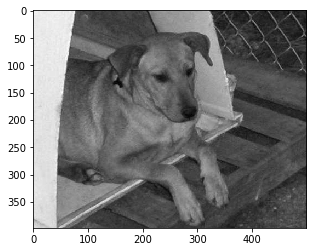

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR = "C:/Users/Rahul/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:
img_array

array([[189, 189, 189, ...,  29,  29,  31],
       [186, 186, 186, ...,  36,  35,  36],
       [184, 185, 185, ...,  35,  33,  33],
       ...,
       [168, 169, 170, ...,  71,  72,  72],
       [169, 170, 171, ...,  68,  67,  67],
       [168, 169, 170, ...,  64,  63,  62]], dtype=uint8)

In [7]:
print(img_array.shape)

(398, 500)


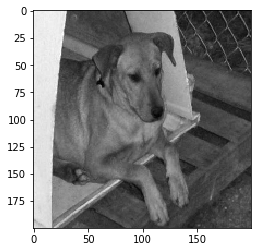

In [8]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 12486/12486 [06:12<00:00, 33.50it/s]


24916


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
0
1
1
0
0
0
0


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Complete")

[[[[110]
   [110]
   [110]
   ...
   [102]
   [101]
   [101]]

  [[105]
   [105]
   [105]
   ...
   [101]
   [ 99]
   [ 99]]

  [[103]
   [103]
   [103]
   ...
   [104]
   [104]
   [104]]

  ...

  [[254]
   [254]
   [254]
   ...
   [ 98]
   [ 95]
   [ 94]]

  [[253]
   [253]
   [254]
   ...
   [ 97]
   [101]
   [ 92]]

  [[252]
   [252]
   [253]
   ...
   [ 92]
   [ 96]
   [ 97]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()